In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import qgrid
from datetime import datetime
from dateutil import tz
import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed
from sklearn import preprocessing

pd.options.display.mpl_style = 'default'
%matplotlib inline

In [10]:
sent_data = pd.read_csv('/Users/shivankurkapoor/Desktop/Study/DeepStocks/Data/stocks_sentdex_1-6-2016.csv')

In [11]:
head = sent_data[:10]
qgrid_widget = qgrid.show_grid(head, show_toolbar=True)
qgrid_widget

In [12]:
sent_data.describe()

/Users/shivankurkapoor/Developer/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning:

Invalid value encountered in percentile



,id,time,value,MA100,MA250,MA500,MA5000
count,2.270352e+07,2.270352e+07,2.270352e+07,2.196228e+07,2.196228e+07,2.196228e+07,2.196228e+07
mean,1.208880e+07,1.423665e+09,4.555768e+00,4.577383e+00,4.577092e+00,4.575863e+00,4.553565e+00
std,6.748359e+06,2.601570e+07,2.271230e+01,6.546188e+00,6.419664e+00,6.279868e+00,4.882438e+00
min,1.000000e+00,1.350265e+09,-1.128000e+03,-9.793000e+01,-8.189600e+01,-7.910200e+01,-3.723000e+01
25%,6.542247e+06,1.409370e+09,-1.000000e+00,NaN,NaN,NaN,NaN
50%,1.221814e+07,1.432679e+09,3.000000e+00,NaN,NaN,NaN,NaN
75%,1.789402e+07,1.442998e+09,7.000000e+00,NaN,NaN,NaN,NaN
max,2.356990e+07,1.452107e+09,1.350000e+03,7.174000e+01,6.612400e+01,5.947400e+01,3.700000e+01


In [69]:
sentiment_appl = sent_data[sent_data['type'] == 'aapl']

In [70]:
sentiment_appl.head()

,id,time,type,value,open,close,high,low,MA100,MA250,MA500,MA5000
0,1,1350265281,aapl,-1,NaN,NaN,NaN,NaN,-1.000000,-1.000000,-1.000000,-1.000000
1,2,1350265359,aapl,6,NaN,NaN,NaN,NaN,2.500000,2.500000,2.500000,2.500000
2,3,1350265374,aapl,-6,NaN,NaN,NaN,NaN,-0.333333,-0.333333,-0.333333,-0.333333
3,4,1350265405,aapl,5,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000
4,5,1350265422,aapl,2,NaN,NaN,NaN,NaN,1.200000,1.200000,1.200000,1.200000


In [71]:
sentiment_appl.sort_values(by=['time'], inplace=True)

/Users/shivankurkapoor/Developer/anaconda/lib/python2.7/site-packages/jupyter_nbextensions_configurator/__init__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [72]:
sentiment_appl['date'] = pd.to_datetime(sentiment_appl['time'], unit='s')

/Users/shivankurkapoor/Developer/anaconda/lib/python2.7/site-packages/jupyter_nbextensions_configurator/__init__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



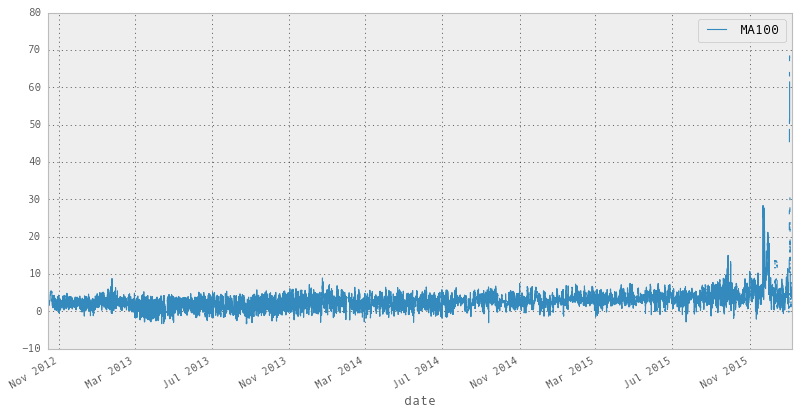

In [73]:
sentiment_appl.plot('date', 'MA100', figsize=(12,6))

/Users/shivankurkapoor/Developer/anaconda/lib/python2.7/site-packages/jupyter_nbextensions_configurator/__init__.py:1: FutureWarning:


The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.



{'boxes': [<matplotlib.lines.Line2D at 0x13bd25d50>,
 'caps': [<matplotlib.lines.Line2D at 0x13bd20690>,
 'fliers': [<matplotlib.lines.Line2D at 0x13bbab2d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x13bd20e90>,
 'whiskers': [<matplotlib.lines.Line2D at 0x13bd25e50>,
  <matplotlib.lines.Line2D at 0x13ba33c90>]}

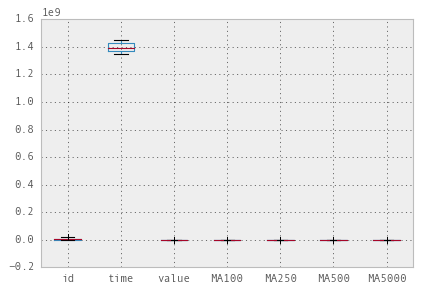

In [74]:
sentiment_appl.boxplot(figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13b76a1d0>,
      dtype=object)

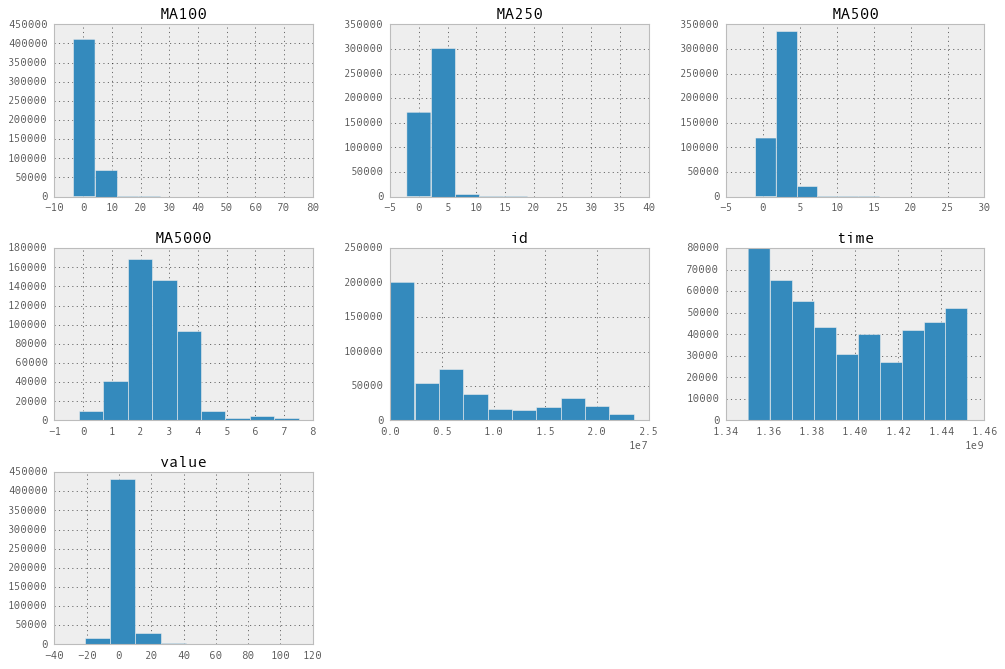

In [75]:
sentiment_appl.hist(figsize=(15,10))

In [76]:
sentiment_appl.head()

,id,time,type,value,open,close,high,low,MA100,MA250,MA500,MA5000,date
0,1,1350265281,aapl,-1,NaN,NaN,NaN,NaN,-1.000000,-1.000000,-1.000000,-1.000000,2012-10-15 01:41:21
1,2,1350265359,aapl,6,NaN,NaN,NaN,NaN,2.500000,2.500000,2.500000,2.500000,2012-10-15 01:42:39
2,3,1350265374,aapl,-6,NaN,NaN,NaN,NaN,-0.333333,-0.333333,-0.333333,-0.333333,2012-10-15 01:42:54
3,4,1350265405,aapl,5,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,2012-10-15 01:43:25
4,5,1350265422,aapl,2,NaN,NaN,NaN,NaN,1.200000,1.200000,1.200000,1.200000,2012-10-15 01:43:42


In [353]:
sentiment_appl_filtered = sentiment_appl[['time', 'type', 'value', 'date']]

In [354]:
numrows, numcols = sentiment_appl_filtered.shape

In [355]:
sentiment_appl_filtered.head()

,time,type,value,date
0,1350265281,aapl,-1,2012-10-15 01:41:21
1,1350265359,aapl,6,2012-10-15 01:42:39
2,1350265374,aapl,-6,2012-10-15 01:42:54
3,1350265405,aapl,5,2012-10-15 01:43:25
4,1350265422,aapl,2,2012-10-15 01:43:42


In [356]:
sentiment_appl_filtered = sentiment_appl_filtered.reset_index(drop=True)

In [357]:
sentiment_appl_filtered.head()

,time,type,value,date
0,1350265281,aapl,-1,2012-10-15 01:41:21
1,1350265359,aapl,6,2012-10-15 01:42:39
2,1350265374,aapl,-6,2012-10-15 01:42:54
3,1350265405,aapl,5,2012-10-15 01:43:25
4,1350265422,aapl,2,2012-10-15 01:43:42


In [358]:
sentiment_appl_filtered.rename(columns={'type' : 'ticker'}, inplace=True)

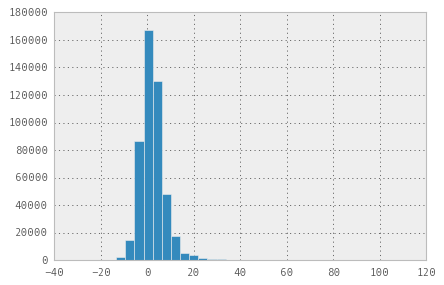

In [359]:
sentiment_appl_filtered['value'].hist(bins=40)

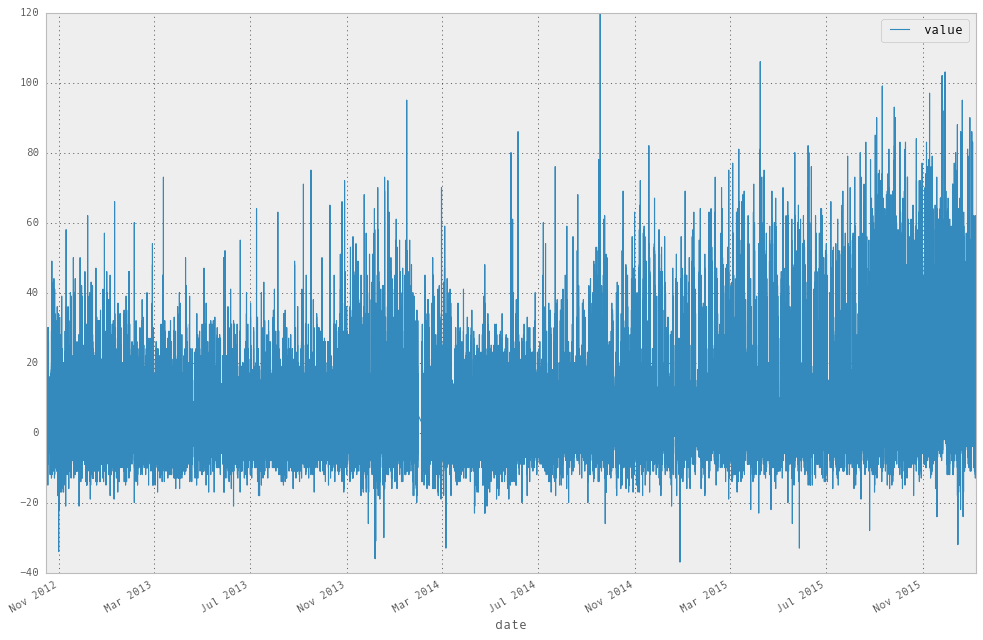

In [360]:
sentiment_appl_filtered.plot(x='date', y='value', figsize=(15, 10))

In [361]:
sentiment_appl_filtered.dtypes

time               int64
ticker            object
value              int64
date      datetime64[ns]
dtype: object

In [137]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-3,6))

In [138]:
sentiment_appl_filtered.value = min_max_scaler.fit_transform(sentiment_appl_filtered.value)

/Users/shivankurkapoor/Developer/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.

/Users/shivankurkapoor/Developer/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.

/Users/shivankurkapoor/Developer/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.



In [362]:
sentiment_appl_filtered.describe(include='all')

,time,ticker,value,date
count,4.827380e+05,482738,482738.000000,482738
unique,NaN,1,NaN,467880
top,NaN,aapl,NaN,2013-01-01 10:27:24
freq,NaN,482738,NaN,6
first,NaN,NaN,NaN,2012-10-15 01:41:21
last,NaN,NaN,NaN,2016-01-06 18:50:35
mean,1.395920e+09,NaN,2.642806,NaN
std,3.165959e+07,NaN,6.526092,NaN
min,1.350265e+09,NaN,-37.000000,NaN
25%,1.366665e+09,NaN,-1.000000,NaN


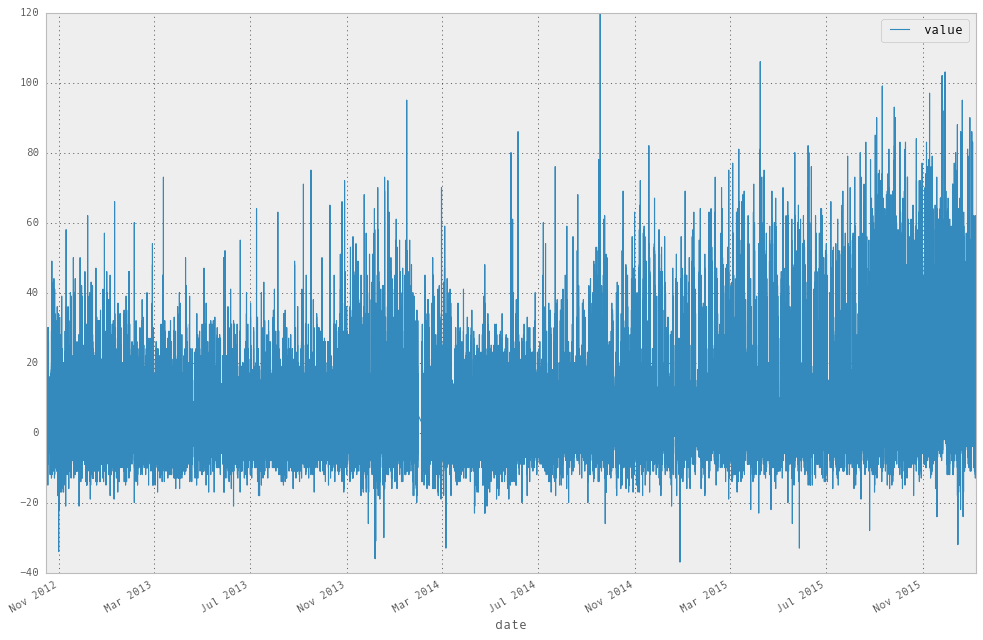

In [159]:
sentiment_appl_filtered.plot(x='date', y='value', figsize=(15, 10))

In [266]:
sentiment_appl_filtered.value.value_counts()

 2      54095
 1      50237
 3      45342
-1      37710
 4      33187
-2      32269
 5      29044
-3      27357
 0      25190
 6      22339
 7      16867
-4      14425
 8      13181
-5      12688
 9       9785
 10      7961
-6       7563
 11      6061
 12      4776
 13      3933
-7       3747
 14      2695
-8       2309
 15      2223
 16      1878
-10      1409
 17      1375
-9       1343
 18      1191
 19       921
        ...  
 86         7
 74         7
 81         6
 76         6
 80         5
 79         5
-22         5
 93         5
-23         5
-24         5
 97         4
 95         4
 102        3
 96         3
-26         3
 84         3
-36         2
 99         2
-33         2
 85         1
 89         1
-28         1
-30         1
-32         1
-34         1
-37         1
 120        1
 106        1
 88         1
-31         1
Name: value, dtype: int64

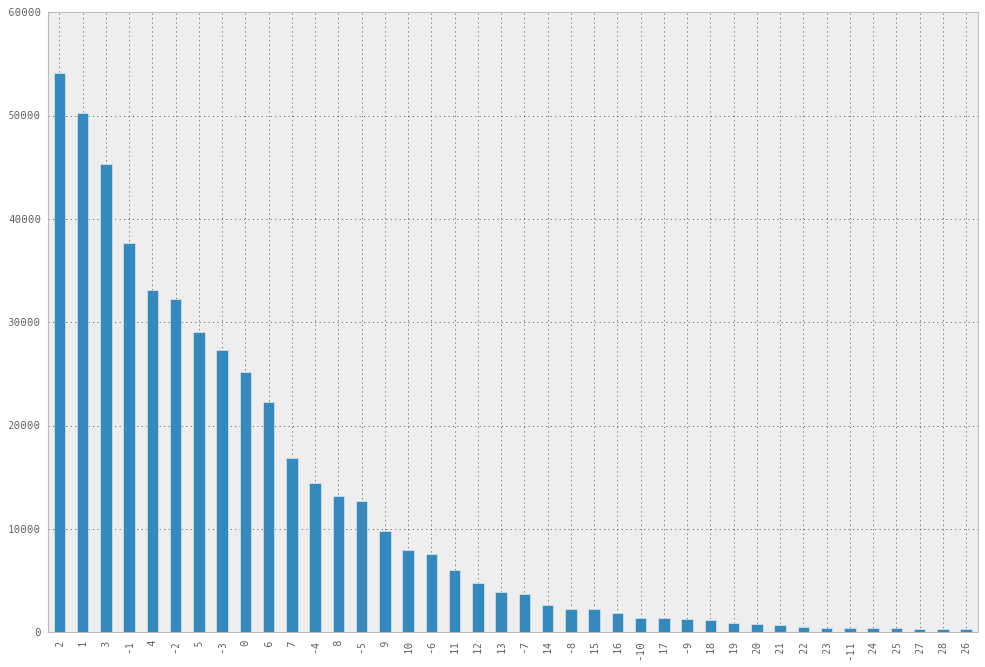

In [267]:
sentiment_appl_filtered.value.value_counts()[:40].plot(kind='bar', figsize=(15,10))

In [363]:
sentiment_appl_filtered.head()

,time,ticker,value,date
0,1350265281,aapl,-1,2012-10-15 01:41:21
1,1350265359,aapl,6,2012-10-15 01:42:39
2,1350265374,aapl,-6,2012-10-15 01:42:54
3,1350265405,aapl,5,2012-10-15 01:43:25
4,1350265422,aapl,2,2012-10-15 01:43:42


In [364]:
sentiment_appl_filtered.index = sentiment_appl_filtered.date

In [366]:
sentiment_appl_filtered.drop(['date'], axis=1, inplace=True)

In [367]:
sentiment_appl_filtered.head()

,ticker,value
date,,
2012-10-15 01:41:21,aapl,-1
2012-10-15 01:42:39,aapl,6
2012-10-15 01:42:54,aapl,-6
2012-10-15 01:43:25,aapl,5
2012-10-15 01:43:42,aapl,2


In [368]:
newindex = pd.date_range(start=sentiment_appl_filtered.index[0], end=sentiment_appl_filtered.index[-1], freq='1H')

In [369]:
len(sentiment_appl_filtered.index)

482738

In [370]:
dupindex = sentiment_appl_filtered[sentiment_appl_filtered.index.duplicated()].index

In [371]:
dupdata = sentiment_appl_filtered.loc[dupindex]

In [372]:
grpdupeddata = dupdata.groupby(by=dupdata.index, axis=0).mean()

In [373]:
sentiment_appl_filtered = sentiment_appl_filtered.reset_index()
sentiment_appl_filtered = sentiment_appl_filtered.drop_duplicates(subset='date', keep=False).set_index('date')

In [374]:
mergeddata = sentiment_appl_filtered.append([grpdupeddata])

In [375]:
mergeddata = mergeddata.sort_index()

In [377]:
mergeddata.head()

,ticker,value
date,,
2012-10-15 01:41:21,aapl,-1.0
2012-10-15 01:42:39,aapl,6.0
2012-10-15 01:42:54,aapl,-6.0
2012-10-15 01:43:25,aapl,5.0
2012-10-15 01:43:42,aapl,2.0


In [378]:
unsampled_data = mergeddata.reindex(newindex.union(mergeddata.index))

In [379]:
unsampled_data.head(10)

,ticker,value
2012-10-15 01:41:21,aapl,-1.0
2012-10-15 01:42:39,aapl,6.0
2012-10-15 01:42:54,aapl,-6.0
2012-10-15 01:43:25,aapl,5.0
2012-10-15 01:43:42,aapl,2.0
2012-10-15 01:44:11,aapl,22.0
2012-10-15 01:45:23,aapl,-1.0
2012-10-15 01:45:54,aapl,6.0
2012-10-15 01:46:01,aapl,-1.0
2012-10-15 01:46:13,aapl,4.0


In [380]:
unsampled_data.value = unsampled_data.value.interpolate(method='time')

In [381]:
unsampled_data.fillna(value='aapl', inplace=True)

In [390]:
resampled_data = unsampled_data.resample('1H').mean()

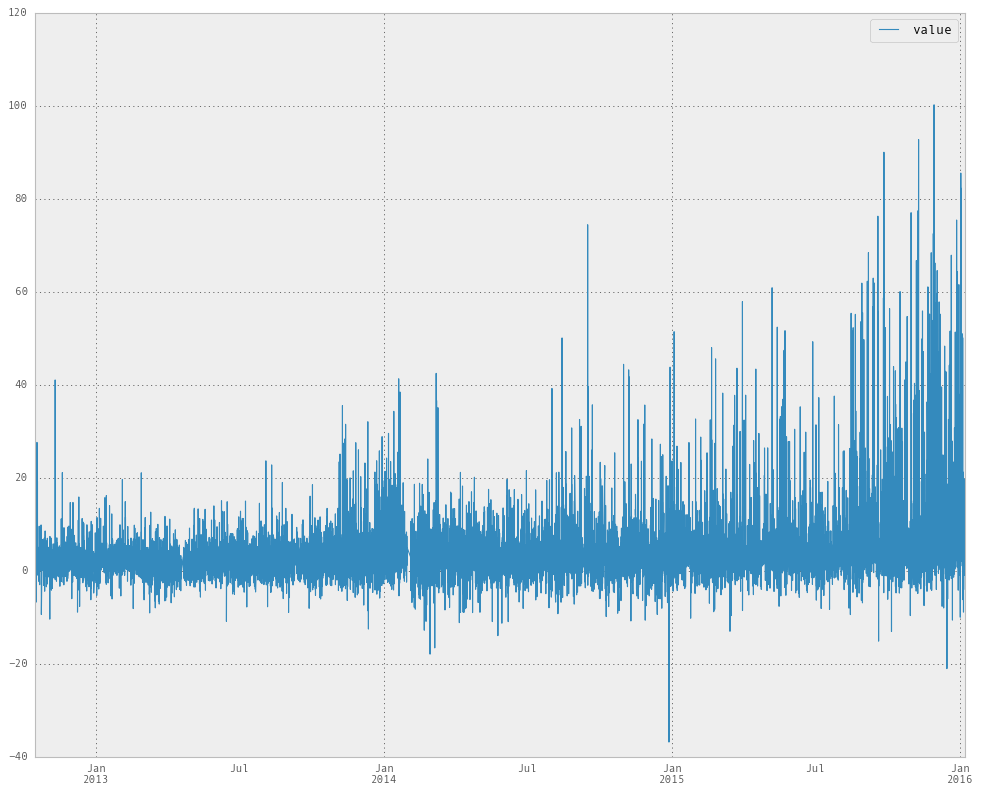

In [392]:
resampled_data.plot(figsize=(15, 12))

In [401]:
resampled_data['ticker'] = pd.Series(["aapl"]*len(resampled_data))

In [406]:
resampled_data.fillna(value='aapl', inplace=True)

In [410]:
resampled_data.rename(columns={'value': 'sentidx'}, inplace=True)

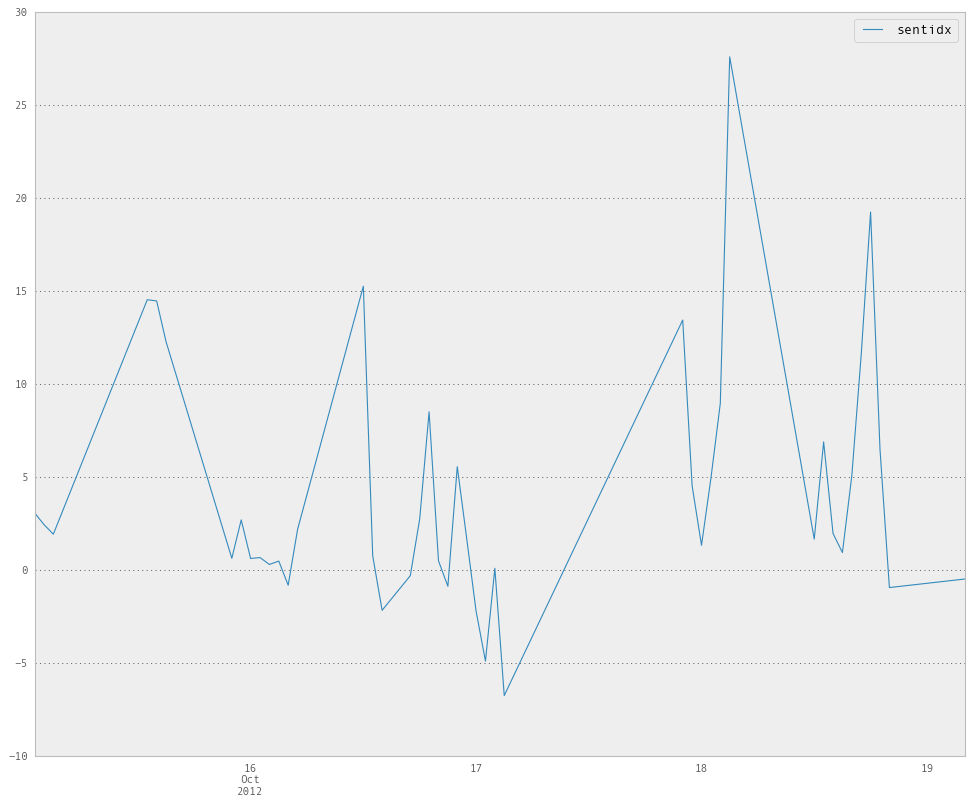

In [427]:
resampled_data[:100].plot(figsize=(15, 12))

In [417]:
finaldf = resampled_data.reset_index().rename(columns={'index':'timestamp'})

In [458]:
finaldf.to_csv('/Users/shivankurkapoor/Desktop/Study/DeepStocks/Data/sentiment_aapl.csv')

In [425]:
finaldf.iloc[-1]

timestamp    2016-01-06 18:00:00
sentidx                  3.06399
ticker                      aapl
Name: 28289, dtype: object

In [437]:
finaldf.index = finaldf.timestamp

In [441]:
finaldf = finaldf.resample("D").mean()

In [448]:
finaldf['ticker'] = pd.Series(['aapl']*len(finaldf))

In [449]:
finaldf.reset_index(inplace=True)

In [451]:
finaldf.drop(['index'], axis=1, inplace=True)

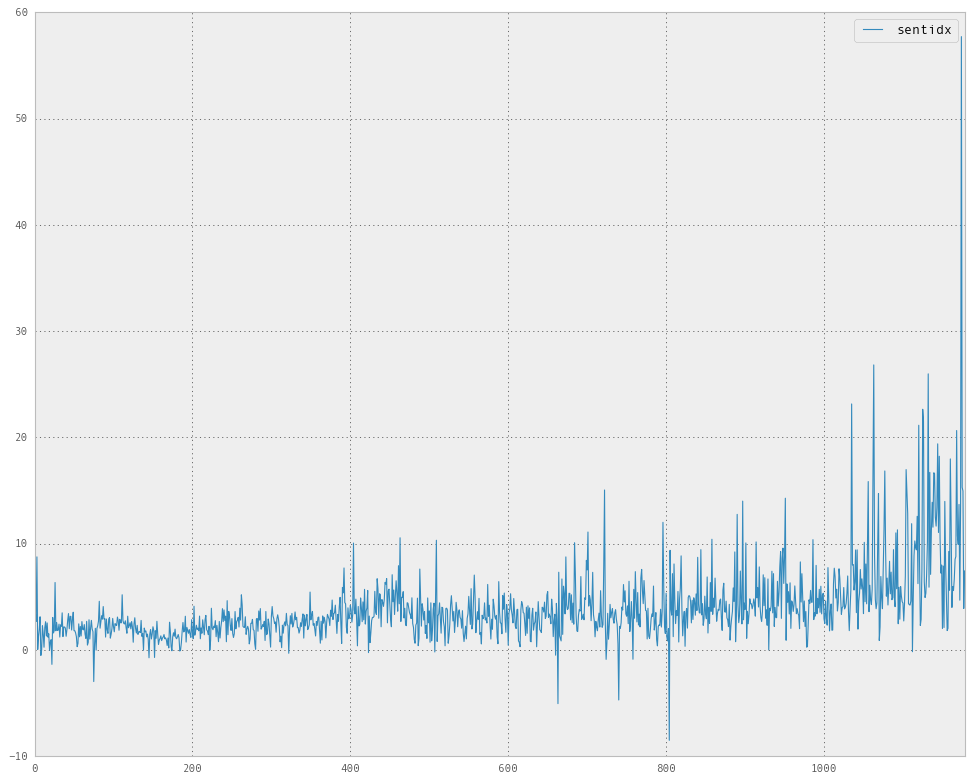

In [456]:
finaldf.plot(figsize=(15, 12))

In [457]:
len(finaldf)

1179